In [327]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import folium #open street map
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from xgboost import XGBClassifier

%matplotlib inline

In [328]:
data = pd.read_csv("DataSet/Train.csv")

In [329]:
data.head(5)

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,isfywypmkqqhyft,2016-07-27,08:05:51 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
1,mqsfxyvuqpbwomk,2016-07-27,08:06:11 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
2,alspwwtbdvqsgby,2016-07-27,08:08:57 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
3,szitxhhqduyrqpg,2016-07-27,08:09:08 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
4,krisdqzczivvwcp,2016-07-27,08:11:01 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False


In [330]:
print(data.shape)

(1284, 19)


## Checking the unique values in the columns

In [331]:
for col in data.columns:
    print("for column: *** ", col, " *** total unique values are:", len(data[col].value_counts()))

for column: ***  id_code  *** total unique values are: 1284
for column: ***  current_date  *** total unique values are: 61
for column: ***  current_time  *** total unique values are: 1262
for column: ***  source_name  *** total unique values are: 188
for column: ***  destination_name  *** total unique values are: 218
for column: ***  train_name  *** total unique values are: 560
for column: ***  target  *** total unique values are: 3
for column: ***  country_code_source  *** total unique values are: 4
for column: ***  longitude_source  *** total unique values are: 187
for column: ***  latitude_source  *** total unique values are: 187
for column: ***  mean_halt_times_source  *** total unique values are: 154
for column: ***  country_code_destination  *** total unique values are: 5
for column: ***  longitude_destination  *** total unique values are: 216
for column: ***  latitude_destination  *** total unique values are: 213
for column: ***  mean_halt_times_destination  *** total unique val

### Checking for null values

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 19 columns):
id_code                        1284 non-null object
current_date                   1284 non-null object
current_time                   1284 non-null object
source_name                    1284 non-null object
destination_name               1284 non-null object
train_name                     1284 non-null object
target                         1284 non-null object
country_code_source            1283 non-null object
longitude_source               1283 non-null float64
latitude_source                1283 non-null float64
mean_halt_times_source         1283 non-null float64
country_code_destination       1251 non-null object
longitude_destination          1251 non-null float64
latitude_destination           1251 non-null float64
mean_halt_times_destination    1251 non-null float64
current_year                   1284 non-null int64
current_week                   1284 non-null int64
curre

In [333]:
for col in data.columns:
    print("for column: *** ", col, " *** total NaN values are:", data[col].isna().sum())

for column: ***  id_code  *** total NaN values are: 0
for column: ***  current_date  *** total NaN values are: 0
for column: ***  current_time  *** total NaN values are: 0
for column: ***  source_name  *** total NaN values are: 0
for column: ***  destination_name  *** total NaN values are: 0
for column: ***  train_name  *** total NaN values are: 0
for column: ***  target  *** total NaN values are: 0
for column: ***  country_code_source  *** total NaN values are: 1
for column: ***  longitude_source  *** total NaN values are: 1
for column: ***  latitude_source  *** total NaN values are: 1
for column: ***  mean_halt_times_source  *** total NaN values are: 1
for column: ***  country_code_destination  *** total NaN values are: 33
for column: ***  longitude_destination  *** total NaN values are: 33
for column: ***  latitude_destination  *** total NaN values are: 33
for column: ***  mean_halt_times_destination  *** total NaN values are: 33
for column: ***  current_year  *** total NaN values a

### We can observe that the NaN values are present in:
`country_code_destination`, `longitude_destination`, `latitude_destination` and`mean_halt_times_destination`

### Printing the values to see what is the similarity between NaN values

In [334]:
nandf = data[data.isna().any(axis=1)]
nandf

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend
0,isfywypmkqqhyft,2016-07-27,08:05:51 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.164740,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
1,mqsfxyvuqpbwomk,2016-07-27,08:06:11 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.164740,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
2,alspwwtbdvqsgby,2016-07-27,08:08:57 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.164740,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
3,szitxhhqduyrqpg,2016-07-27,08:09:08 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.164740,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
4,krisdqzczivvwcp,2016-07-27,08:11:01 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.164740,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
5,orrnrrynwpmcxmm,2016-07-27,08:11:50 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.164740,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
6,raoheuoxqijqxcz,2016-07-27,08:12:47 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.164740,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
7,huhiqfxnerbedmq,2016-07-27,08:13:23 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.164740,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
8,igqcnhdcmejjkah,2016-07-27,08:15:38 PM,station$147,station$1,UNDEFINED,medium,whber,4.356801,50.845658,634.164740,NaN,NaN,NaN,NaN,2016,30,Wednesday,False
9,taxcjmdnymvsvva,2016-07-27,08:16:51 PM,station$147,station$1,UNDEFINED,medium,whber,4.356801,50.845658,634.164740,NaN,NaN,NaN,NaN,2016,30,Wednesday,False


### It is been observed that the station started is wheber week was 30. We should keep the NaN values as it might give us the relationship as well. There is no randomness observed in the NaN values.

### Checking the distribution of target values.

In [335]:
print(data[data["target"]=="medium"].shape[0])
print(data[data["target"]=="high"].shape[0])
print(data[data["target"]=="low"].shape[0])


360
392
532


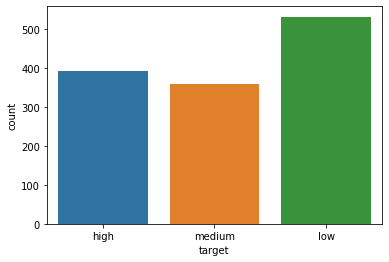

In [336]:
sns.countplot(x="target", data = data)
plt.show()

Plotting the lattitude and longitude in the map using folium

In [337]:
# map_osm = folium.Map(location=[50.845658, 4.356801], tiles='Stamen Toner')
# # folium.Marker(list("50.845658",int("4.356801"))).add_to(map_osm)
# map_osm

In [338]:
# Plotting the source locations on OSM
map_osm = folium.Map(location=[50.845658, 4.356801], tiles='Stamen Toner')
for ind, row in data.iterrows():
    if ("nan" not in str(row["latitude_source"])) or ("nan" not in str(row["longitude_source"])):
#         print(row["latitude_source"],row["longitude_source"])
        folium.Marker(list((row["latitude_source"],row["longitude_source"])), popup=(str(row["longitude_source"])+str(row["latitude_source"]))).add_to(map_osm)
# #     folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])), popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

## Printing destination points in map

In [339]:
# Plotting the destination locations on OSM
map_osm = folium.Map(location=[50.845658, 4.356801], tiles='Stamen Toner')
for ind, row in data.iterrows():
    if ("nan" not in str(row["latitude_destination"])) or ("nan" not in str(row["longitude_destination"])):
#         print(row["latitude_destination"],row["longitude_destination"])
        folium.Marker(list((row["latitude_destination"],row["longitude_destination"])), popup=(str(row["longitude_destination"])+str(row["latitude_destination"]))).add_to(map_osm)
# #     folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])), popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

#### No outliers are present in the dataset. Those all the correct source and destinations.

## We will keep the distance of trip as well in the dataframe

In [340]:
# https://gist.github.com/rochacbruno/2883505
import math
#Though actual distance is kind of different(in good sense) but yes this distance will also be helpful because we are working on relations.
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    if "nan" in str(lat1) or "nan" in str(lat2) or "nan" in str(lon1) or "nan" in str(lon2):
        return 999999

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d


In [341]:
trip_dist = []
for ind, row in data.iterrows():
    trip_dist.append(distance( (row["latitude_source"],row["longitude_source"]), (row["latitude_destination"],row["longitude_destination"])))
len(trip_dist)

1284

In [342]:
data["trip_distance"] = trip_dist
data.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,trip_distance
0,isfywypmkqqhyft,2016-07-27,08:05:51 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0
1,mqsfxyvuqpbwomk,2016-07-27,08:06:11 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0
2,alspwwtbdvqsgby,2016-07-27,08:08:57 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0
3,szitxhhqduyrqpg,2016-07-27,08:09:08 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0
4,krisdqzczivvwcp,2016-07-27,08:11:01 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0


In [343]:
data["trip_distance"].value_counts()

38.865837        43
49.181860        42
999999.000000    34
1.582962         32
25.038936        32
2.143076         21
49.969819        20
1.802814         19
19.431791        18
3.090982         17
11.399663        15
25.526847        15
23.267284        14
80.590115        14
12.919437        13
18.199588        13
20.497258        12
53.519807        12
68.264905        11
19.407636        11
19.534781        11
2.927956         10
13.172856        10
50.735932        10
7.961363          9
9.520970          9
29.217242         9
10.923695         9
83.766196         9
0.000000          8
                 ..
33.733481         1
66.029801         1
19.256355         1
32.547832         1
25.533632         1
23.468265         1
30.205999         1
49.728556         1
4.406862          1
1.795223          1
24.681637         1
25.678076         1
41.507199         1
12.568243         1
2.837695          1
4.461459          1
41.579398         1
6.195673          1
22.273274         1


### here we can observe that for 34 values we dont have distance with ourself so our function is printing 99999.000000 .

## Sorting based on date time

### Merging date and time

In [344]:
data["current_date_time"] = data["current_date"]+" "+data["current_time"]
data.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,...,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,trip_distance,current_date_time
0,isfywypmkqqhyft,2016-07-27,08:05:51 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,...,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:05:51 PM
1,mqsfxyvuqpbwomk,2016-07-27,08:06:11 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,...,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:06:11 PM
2,alspwwtbdvqsgby,2016-07-27,08:08:57 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,...,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:08:57 PM
3,szitxhhqduyrqpg,2016-07-27,08:09:08 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,...,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:09:08 PM
4,krisdqzczivvwcp,2016-07-27,08:11:01 PM,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,...,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:11:01 PM


In [345]:
if "current_date" in data.columns:
    data = data.drop("current_date", axis=1)
if "current_time" in data.columns:
    data = data.drop("current_time", axis=1)

In [346]:
data.head()

,id_code,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,trip_distance,current_date_time
0,isfywypmkqqhyft,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:05:51 PM
1,mqsfxyvuqpbwomk,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:06:11 PM
2,alspwwtbdvqsgby,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:08:57 PM
3,szitxhhqduyrqpg,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:09:08 PM
4,krisdqzczivvwcp,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:11:01 PM


#### Sorting w.r.t. date and time

In [347]:
#converting the project into date and time format so we can sort it.
data["cdt"] = pd.to_datetime(data['current_date_time'])

In [348]:
data.sort_values(by="cdt", inplace=True)
data.head()

,id_code,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,trip_distance,current_date_time,cdt
0,isfywypmkqqhyft,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:05:51 PM,2016-07-27 20:05:51
1,mqsfxyvuqpbwomk,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:06:11 PM,2016-07-27 20:06:11
2,alspwwtbdvqsgby,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:08:57 PM,2016-07-27 20:08:57
3,szitxhhqduyrqpg,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:09:08 PM,2016-07-27 20:09:08
4,krisdqzczivvwcp,station$147,station$1,ICZVZS,high,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:11:01 PM,2016-07-27 20:11:01


Changing the target name:
    low = 0
    medium = 1
    high = 2

In [349]:
#we dont have to write a precautious condition as it wouldnt affect after multiple exection.
data["target"] = data["target"].replace(to_replace="low", value="0")
data["target"] = data["target"].replace(to_replace="medium", value="1")
data["target"] = data["target"].replace(to_replace="high", value="2")
data.head()

,id_code,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,trip_distance,current_date_time,cdt
0,isfywypmkqqhyft,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:05:51 PM,2016-07-27 20:05:51
1,mqsfxyvuqpbwomk,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:06:11 PM,2016-07-27 20:06:11
2,alspwwtbdvqsgby,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:08:57 PM,2016-07-27 20:08:57
3,szitxhhqduyrqpg,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:09:08 PM,2016-07-27 20:09:08
4,krisdqzczivvwcp,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,NaN,NaN,NaN,NaN,2016,30,Wednesday,False,999999.0,2016-07-27 08:11:01 PM,2016-07-27 20:11:01


## Checking for categorical data

In [350]:
data.shape

(1284, 20)

In [351]:
for col in data.columns:
    print("for column: *** ", col, " *** total unique values are:", len(data[col].value_counts()))

for column: ***  id_code  *** total unique values are: 1284
for column: ***  source_name  *** total unique values are: 188
for column: ***  destination_name  *** total unique values are: 218
for column: ***  train_name  *** total unique values are: 560
for column: ***  target  *** total unique values are: 3
for column: ***  country_code_source  *** total unique values are: 4
for column: ***  longitude_source  *** total unique values are: 187
for column: ***  latitude_source  *** total unique values are: 187
for column: ***  mean_halt_times_source  *** total unique values are: 154
for column: ***  country_code_destination  *** total unique values are: 5
for column: ***  longitude_destination  *** total unique values are: 216
for column: ***  latitude_destination  *** total unique values are: 213
for column: ***  mean_halt_times_destination  *** total unique values are: 171
for column: ***  current_year  *** total unique values are: 1
for column: ***  current_week  *** total unique value

## finding clusters on the bases of pickup location

In [352]:
#Removing nan values from latitude and longitude columns:
print("Before: ",data.shape)
data = data[np.isfinite(data["latitude_source"])] # taking finite values from data where latitude values are finite
data = data[np.isfinite(data["longitude_source"])] # taking finite values from data where longitude values are finite
print("After: ",data.shape)

Before:  (1284, 20)
After:  (1283, 20)


##### We have removed one row from the data

In [353]:
from sklearn.cluster import MiniBatchKMeans, KMeans # Clustering
import gpxpy.geo #Get the haversine distance (conda install -c conda-forge gpxpy)

walkable_distance = 2
pickup_coords = data[["latitude_source", "longitude_source"]].values
neighbours = []

def find_min_distance(cluster_center, cluster_len):
    nice_points = 0
    wrong_points = 0
    less = []
    more = []
    min_dist = 100
    for i in range(0, cluster_len):
        nice_points = 0
        wrong_points = 0
        for j in range(0, cluster_len):
            if j!=i:
                distance = gpxpy.geo.haversine_distance(cluster_centers[i][0], cluster_centers[i][1],cluster_centers[j][0], cluster_centers[j][1])
                min_dist = min(min_dist, distance/(1.60934*1000))
                if (distance/(1.06394*1000)) <= walkable_distance: #for people short distance is at max 800 meter we can still beautify this parameter
                    nice_points+=1
                else:
                    wrong_points+=1
        less.append(nice_points)
        more.append(wrong_points)
    neighbours.append(less)
    print("For Cluster size:", cluster_len, " Avg. number of Clusters within vicinity: ", np.ceil(sum(less)/len(less)), "Number of clusters outside vicinity: ", np.ceil(sum(more)/len(more)), " Minimum inter-cluster distance: ", min_dist)
        

def find_clusters(increment):
    kmeans = MiniBatchKMeans(n_clusters=increment, random_state=42).fit(pickup_coords)
    data["pickup_cluster_number"] = kmeans.predict(data[["latitude_source", "longitude_source"]])
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers)
    return cluster_centers, cluster_len

for increment in range(10, 100, 5):
    cluster_centers, cluster_len = find_clusters(increment)
    find_min_distance(cluster_centers, cluster_len)

For Cluster size: 10  Avg. number of Clusters within vicinity:  0.0 Number of clusters outside vicinity:  9.0  Minimum inter-cluster distance:  16.138744891932465
For Cluster size: 15  Avg. number of Clusters within vicinity:  0.0 Number of clusters outside vicinity:  14.0  Minimum inter-cluster distance:  14.043066454686274
For Cluster size: 20  Avg. number of Clusters within vicinity:  0.0 Number of clusters outside vicinity:  19.0  Minimum inter-cluster distance:  10.616476565721007
For Cluster size: 25  Avg. number of Clusters within vicinity:  0.0 Number of clusters outside vicinity:  24.0  Minimum inter-cluster distance:  9.947139319266977
For Cluster size: 30  Avg. number of Clusters within vicinity:  1.0 Number of clusters outside vicinity:  29.0  Minimum inter-cluster distance:  0.9841280911829858
For Cluster size: 35  Avg. number of Clusters within vicinity:  0.0 Number of clusters outside vicinity:  34.0  Minimum inter-cluster distance:  5.964435116715322
For Cluster size: 4

#### Picking up Number of clusters as 50

In [354]:
cluster_numbers = 10

In [355]:
kmeans = MiniBatchKMeans(n_clusters=40, batch_size=10000,random_state=0).fit(pickup_coords)
data["pickup_cluster_number"] = kmeans.predict(data[["latitude_source", "longitude_source"]])

In [356]:
cluster_centers = kmeans.cluster_centers_
cluster_len = len(cluster_centers)
print(cluster_len)

40


## Cluster Centers:

In [357]:
map_osm = folium.Map(location=[50.845658, 4.356801], tiles='Stamen Toner')
for ind in range(cluster_len):
    
    if ("nan" not in str(row["latitude_source"])) or ("nan" not in str(row["longitude_source"])):
        folium.Marker(list((cluster_centers[ind][0],cluster_centers[ind][1])), popup=(str(cluster_centers[ind][0])+str(cluster_centers[ind][1]))).add_to(map_osm)
map_osm

## Plotting the clusters to visualize it

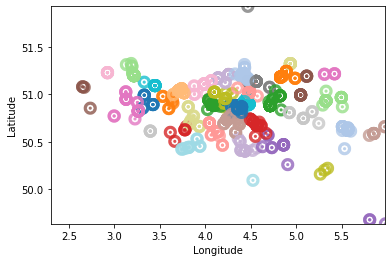

In [358]:
import matplotlib.image as mpimg
# plot_map(sf)
def plot_clusters(frame):
#     plt = plot_map(sf)
    city_long_border = (2.3, 5.982265)
    city_lat_border = (49.638463, 51.925093)
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.scatter(frame.longitude_source.values, frame.latitude_source.values, s=10, lw=10,
               c=frame.pickup_cluster_number.values, cmap='tab20', alpha=0.8)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

plot_clusters(data)

In [359]:
print(data.shape)

(1283, 21)


## Converting "is_weekend" to binary values

In [360]:
data['is_weekend'] = data['is_weekend'].apply(lambda x: 1 if x ==1 else 0)

In [361]:
data.head()

,id_code,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,...,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,trip_distance,current_date_time,cdt,pickup_cluster_number
0,isfywypmkqqhyft,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,NaN,...,NaN,NaN,2016,30,Wednesday,0,999999.0,2016-07-27 08:05:51 PM,2016-07-27 20:05:51,1
1,mqsfxyvuqpbwomk,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,NaN,...,NaN,NaN,2016,30,Wednesday,0,999999.0,2016-07-27 08:06:11 PM,2016-07-27 20:06:11,1
2,alspwwtbdvqsgby,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,NaN,...,NaN,NaN,2016,30,Wednesday,0,999999.0,2016-07-27 08:08:57 PM,2016-07-27 20:08:57,1
3,szitxhhqduyrqpg,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,NaN,...,NaN,NaN,2016,30,Wednesday,0,999999.0,2016-07-27 08:09:08 PM,2016-07-27 20:09:08,1
4,krisdqzczivvwcp,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,NaN,...,NaN,NaN,2016,30,Wednesday,0,999999.0,2016-07-27 08:11:01 PM,2016-07-27 20:11:01,1


In [362]:
data.columns

Index(['id_code', 'source_name', 'destination_name', 'train_name', 'target',
       'country_code_source', 'longitude_source', 'latitude_source',
       'mean_halt_times_source', 'country_code_destination',
       'longitude_destination', 'latitude_destination',
       'mean_halt_times_destination', 'current_year', 'current_week',
       'current_day', 'is_weekend', 'trip_distance', 'current_date_time',
       'cdt', 'pickup_cluster_number'],
      dtype='object')

In [363]:
if "current_data_time" in data.columns:
    data = data.drop("current_data_time", axis=1)

we don't require cdt as we already sorted the data.

## Converting the destination null values to some values:

In [364]:
## filling the destination with no_dest because it may also contain some patterns in it
data["country_code_destination"] = data["country_code_destination"].fillna("No_dest")    

# data["country_code_destination"].isna()

## Splitting the data into train cv and test

In [365]:
data.head()

,id_code,source_name,destination_name,train_name,target,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,...,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,trip_distance,current_date_time,cdt,pickup_cluster_number
0,isfywypmkqqhyft,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,No_dest,...,NaN,NaN,2016,30,Wednesday,0,999999.0,2016-07-27 08:05:51 PM,2016-07-27 20:05:51,1
1,mqsfxyvuqpbwomk,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,No_dest,...,NaN,NaN,2016,30,Wednesday,0,999999.0,2016-07-27 08:06:11 PM,2016-07-27 20:06:11,1
2,alspwwtbdvqsgby,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,No_dest,...,NaN,NaN,2016,30,Wednesday,0,999999.0,2016-07-27 08:08:57 PM,2016-07-27 20:08:57,1
3,szitxhhqduyrqpg,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,No_dest,...,NaN,NaN,2016,30,Wednesday,0,999999.0,2016-07-27 08:09:08 PM,2016-07-27 20:09:08,1
4,krisdqzczivvwcp,station$147,station$1,ICZVZS,2,whber,4.356801,50.845658,634.16474,No_dest,...,NaN,NaN,2016,30,Wednesday,0,999999.0,2016-07-27 08:11:01 PM,2016-07-27 20:11:01,1


In [366]:
if "target" in data.columns:
    data_y = data["target"].values
    data = data.drop("target", axis=1)

In [367]:
from sklearn.model_selection import train_test_split

#Splitting the value in train and test
x_train, x_test, y_train, y_test = train_test_split(data, data_y, test_size=0.3, random_state =3)
# x_train, x_cv, y_train, y_cv = train_test_split(x_1, y_1, test_size=0.3, random_state =3)

print("Shape of training data:",x_train.shape, y_train.shape)
# print("Shape of cv data:",x_cv.shape, y_cv.shape)
print("Shape of testing data: ",x_test.shape, y_test.shape)

Shape of training data: (898, 20) (898,)
Shape of testing data:  (385, 20) (385,)


## Checking for data imbalance

In [368]:
print(x_train.isna().sum())
print(x_train.shape)

id_code                         0
source_name                     0
destination_name                0
train_name                      0
country_code_source             0
longitude_source                0
latitude_source                 0
mean_halt_times_source          0
country_code_destination        0
longitude_destination          23
latitude_destination           23
mean_halt_times_destination    23
current_year                    0
current_week                    0
current_day                     0
is_weekend                      0
trip_distance                   0
current_date_time               0
cdt                             0
pickup_cluster_number           0
dtype: int64
(898, 20)


# Removing nan entries

In [369]:
x_train["target"] = y_train

In [370]:
x_train = x_train.dropna()

In [371]:
y_train = x_train["target"].values

In [372]:
# x_train["target"]

In [373]:
x_train = x_train.drop("target", axis=1)

In [374]:
print(x_train.isna().sum())
print(x_train.shape)

id_code                        0
source_name                    0
destination_name               0
train_name                     0
country_code_source            0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
country_code_destination       0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
trip_distance                  0
current_date_time              0
cdt                            0
pickup_cluster_number          0
dtype: int64
(875, 20)


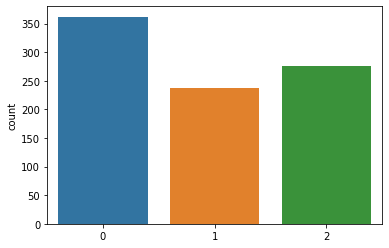

In [375]:
sns.countplot(y_train, data = x_train)
plt.show()

## Upsampling

In [376]:
# x_train

In [377]:
# #Performing upsampling
# smote = SMOTE(random_state=42)
# print("Before Shape: ", x_train.shape)
# x_train, y_train = smote.fit_resample(x_train, y_train)
# print("After Shape: ", x_train.shape)

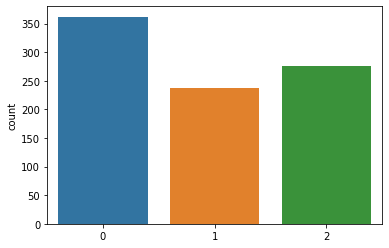

In [378]:
sns.countplot(y_train, data = x_train)
plt.show()

## Checking unique values

In [379]:
from pprint import pprint
cat_columns = []
non_cat_columns = []
for col in data.columns:
    print("for column: *** ", col, " *** total unique values are:", len(data[col].value_counts()))
    if len(data[col].value_counts()) <220:
        cat_columns.append(col)
    else:
        non_cat_columns.append(col)
print("Categorical Columns:")
pprint(cat_columns)
print("Non Categorical Columns:")
pprint(non_cat_columns)


for column: ***  id_code  *** total unique values are: 1283
for column: ***  source_name  *** total unique values are: 187
for column: ***  destination_name  *** total unique values are: 217
for column: ***  train_name  *** total unique values are: 559
for column: ***  country_code_source  *** total unique values are: 4
for column: ***  longitude_source  *** total unique values are: 187
for column: ***  latitude_source  *** total unique values are: 187
for column: ***  mean_halt_times_source  *** total unique values are: 154
for column: ***  country_code_destination  *** total unique values are: 6
for column: ***  longitude_destination  *** total unique values are: 215
for column: ***  latitude_destination  *** total unique values are: 212
for column: ***  mean_halt_times_destination  *** total unique values are: 171
for column: ***  current_year  *** total unique values are: 1
for column: ***  current_week  *** total unique values are: 11
for column: ***  current_day  *** total unique

#### We will treat `mean_halt_times_destination` and `mean_halt_times_source` as numerical values because it is duration of time spent in hotel but in mean.

## Converting these categorical data to one hot encoding

In [380]:
# Avoiding data leakage by splitting at earlier stages
#columns should match

In [381]:
vectorizer = CountVectorizer(lowercase=False)
source_name_one_hot_train = vectorizer.fit_transform(x_train['source_name'].values)
# source_name_one_hot_cv = vectorizer.transform(x_cv['source_name'].values)
source_name_one_hot_test = vectorizer.transform(x_test['source_name'].values)

source_name_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",source_name_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",source_name_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",source_name_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 167)
Shape of Test matrix after one hot encodig  (385, 167)


In [382]:
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(lowercase=False)
destination_name_one_hot_train = vectorizer.fit_transform(x_train['destination_name'].values)
# destination_name_one_hot_cv = vectorizer.transform(x_cv['destination_name'].values)
destination_name_one_hot_test = vectorizer.transform(x_test['destination_name'].values)

destination_name_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",destination_name_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",destination_name_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",destination_name_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 183)
Shape of Test matrix after one hot encodig  (385, 183)


In [383]:
vectorizer = CountVectorizer(lowercase=False)
country_code_source_one_hot_train = vectorizer.fit_transform(x_train['country_code_source'].values)
# country_code_source_one_hot_cv = vectorizer.transform(x_cv['country_code_source'].values)
country_code_source_one_hot_test = vectorizer.transform(x_test['country_code_source'].values)

country_code_source_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",country_code_source_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",country_code_source_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",country_code_source_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 3)
Shape of Test matrix after one hot encodig  (385, 3)


##### We should avoid this column because only one column we got while training our dataset. But we will keep them because orignal dataset is too large and there it should have more than one values.

In [384]:
vectorizer = CountVectorizer(lowercase=False)
country_code_destination_one_hot_train = vectorizer.fit_transform(x_train['country_code_destination'].values)
# country_code_destination_one_hot_cv = vectorizer.transform(x_cv['country_code_destination'].values)
country_code_destination_one_hot_test = vectorizer.transform(x_test['country_code_destination'].values)

country_code_destination_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",country_code_destination_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",country_code_destination_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",country_code_destination_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 4)
Shape of Test matrix after one hot encodig  (385, 4)


### Dropping lattitude and longitude of source and destination as it is no longer required since we have created clusters and named them

In [385]:
if "longitude_source" in x_train.columns:
    x_train = x_train.drop("longitude_source", axis=1)
#     x_cv = x_cv.drop("longitude_source", axis=1)
    x_test = x_test.drop("longitude_source", axis=1)

if "latitude_source" in x_train.columns:
    x_train = x_train.drop("latitude_source", axis=1)
#     x_cv = x_cv.drop("latitude_source", axis=1)
    x_test = x_test.drop("latitude_source", axis=1)

if "longitude_destination" in x_train.columns:
    x_train = x_train.drop("longitude_destination", axis=1)
#     x_cv = x_cv.drop("longitude_destination", axis=1)
    x_test = x_test.drop("longitude_destination", axis=1)

if "latitude_destination" in x_train.columns:
    x_train = x_train.drop("latitude_destination", axis=1)
#     x_cv = x_cv.drop("latitude_destination", axis=1)
    x_test = x_test.drop("latitude_destination", axis=1)

In [386]:
# converting values to string values which are understandable
current_year_train = x_train['current_year'].apply(lambda x: "current_year_"+str(x))
# current_year_cv = x_cv['current_year'].apply(lambda x: "current_year_"+str(x))
current_year_test = x_test['current_year'].apply(lambda x: "current_year_"+str(x))


In [387]:
vectorizer = CountVectorizer(lowercase=False)
current_year_one_hot_train = vectorizer.fit_transform(current_year_train)
# current_year_one_hot_cv = vectorizer.transform(current_year_cv)
current_year_one_hot_test = vectorizer.transform(current_year_test)

current_year_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",current_year_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",current_year_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",current_year_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 1)
Shape of Test matrix after one hot encodig  (385, 1)


In [388]:
# converting values to string values which are understandable
current_week_train = x_train['current_week'].apply(lambda x: "current_week_"+str(x))
# current_week_cv = x_cv['current_week'].apply(lambda x: "current_week_"+str(x))
current_week_test = x_test['current_week'].apply(lambda x: "current_week_"+str(x))


In [389]:
vectorizer = CountVectorizer(lowercase=False)
current_week_one_hot_train = vectorizer.fit_transform(current_week_train)
# current_week_one_hot_cv = vectorizer.transform(current_week_cv)
current_week_one_hot_test = vectorizer.transform(current_week_test)

current_week_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",current_week_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",current_week_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",current_week_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 11)
Shape of Test matrix after one hot encodig  (385, 11)


In [390]:
# converting values to string values which are understandable
current_day_train = x_train['current_day'].apply(lambda x: "current_day_"+str(x))
# current_day_cv = x_cv['current_day'].apply(lambda x: "current_day_"+str(x))
current_day_test = x_test['current_day'].apply(lambda x: "current_day_"+str(x))


In [391]:

vectorizer = CountVectorizer(lowercase=False)
current_day_one_hot_train = vectorizer.fit_transform(current_day_train)
# current_day_one_hot_cv = vectorizer.transform(current_day_cv)
current_day_one_hot_test = vectorizer.transform(current_day_test)

current_day_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",current_day_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",current_day_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",current_day_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 7)
Shape of Test matrix after one hot encodig  (385, 7)


In [392]:
pickup_cluster_number_train = x_train['pickup_cluster_number'].apply(lambda x: "pickup_cluster_number_"+str(x))
# pickup_cluster_number_cv = x_cv['pickup_cluster_number'].apply(lambda x: "pickup_cluster_number_"+str(x))
pickup_cluster_number_test = x_test['pickup_cluster_number'].apply(lambda x: "pickup_cluster_number_"+str(x))

In [393]:
vectorizer = CountVectorizer(lowercase=False)
pickup_cluster_number_one_hot_train = vectorizer.fit_transform(pickup_cluster_number_train)
# pickup_cluster_number_one_hot_cv = vectorizer.transform(pickup_cluster_number_cv)
pickup_cluster_number_one_hot_test = vectorizer.transform(pickup_cluster_number_test)

country_code_source_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",pickup_cluster_number_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",pickup_cluster_number_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",pickup_cluster_number_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 38)
Shape of Test matrix after one hot encodig  (385, 38)


## Addressing Numerical Data

In [394]:
from sklearn.preprocessing import StandardScaler

_scaler = StandardScaler()
mhtd_train = _scaler.fit_transform(x_train['mean_halt_times_destination'].values.reshape(-1,1)) 
# mhtd_cv = _scaler.transform(x_cv['mean_halt_times_destination'].values.reshape(-1,1)) 
mhtd_test = _scaler.transform(x_test['mean_halt_times_destination'].values.reshape(-1,1)) 



In [395]:
_scaler = StandardScaler()
mhts_train = _scaler.fit_transform(x_train['mean_halt_times_source'].values.reshape(-1,1)) 
# mhts_cv = _scaler.transform(x_cv['mean_halt_times_source'].values.reshape(-1,1)) 
mhts_test = _scaler.transform(x_test['mean_halt_times_source'].values.reshape(-1,1))

In [396]:
_scaler = StandardScaler()
trip_dist_train = _scaler.fit_transform(x_train['trip_distance'].values.reshape(-1,1)) 
# mhts_cv = _scaler.transform(x_cv['mean_halt_times_source'].values.reshape(-1,1)) 
trip_dist_test = _scaler.transform(x_test['trip_distance'].values.reshape(-1,1))

In [397]:

x_train_final = hstack([source_name_one_hot_train,
                        destination_name_one_hot_train,
                        country_code_source_one_hot_train,
                        country_code_destination_one_hot_train,
                        current_year_one_hot_train,
                        current_week_one_hot_train,
                        current_day_one_hot_train,
                        pickup_cluster_number_one_hot_train,
                        mhtd_train,
                        mhts_train,
                        trip_dist_train])

# x_cv_final = hstack([source_name_one_hot_cv,
#                         destination_name_one_hot_cv,
#                         country_code_source_one_hot_cv,
#                         country_code_destination_one_hot_cv,
#                         current_year_one_hot_cv,
#                         current_week_one_hot_cv,
#                         current_day_one_hot_cv,
#                         pickup_cluster_number_one_hot_cv,
#                         mhtd_cv,
#                         mhts_cv])

x_test_final = hstack([source_name_one_hot_test,
                        destination_name_one_hot_test,
                        country_code_source_one_hot_test,
                        country_code_destination_one_hot_test,
                        current_year_one_hot_test,
                        current_week_one_hot_test,
                        current_day_one_hot_test,
                        pickup_cluster_number_one_hot_test,
                        mhtd_test,
                        trip_dist_test,
                        mhts_test])



In [398]:
print("x_train: ", x_train_final.shape, "  || y_train: ", y_train.shape)
# print("x_cv: ", x_cv_final.shape, "     || y_cv: ", y_cv.shape)
print("x_test: ", x_test_final.shape, "   || y_test: ", y_test.shape)


x_train:  (875, 417)   || y_train:  (875,)
x_test:  (385, 417)    || y_test:  (385,)


In [399]:
# x_train_final.isna()

## Writing in a csv file as mentioned in the problem statement

In [322]:
temp = pd.DataFrame(x_train_final.toarray())
temp["target"] = y_train

In [323]:
temp.to_csv("re_train.csv")

In [246]:
pd.DataFrame(x_train_final.toarray()).to_csv("x_train.csv")
pd.DataFrame(x_test_final.toarray()).to_csv("x_test.csv")


## Applying Machine Learning Model XGBoost

In [75]:
from sklearn.metrics import f1_score
min_child_weight= [ 1, 2, 3]
max_depth= [1, 2, 3]
n_estimators= [ 7000, 10000, 12000]
learning_rate = [0.3, 0.5, 0.7]
cl = ['min_child_weight', 'max_depth', 'n_estimators', 'train_f1_score', 'test_f1_score']
xgboostparam = pd.DataFrame(columns=cl)
for mcw in min_child_weight:
    for md in max_depth:
        for ne in n_estimators:
            for lr in learning_rate:
                xgbreg = XGBClassifier(nthread=-1,missing=None,seed=8, 
                                       min_child_weight=mcw, 
                                       max_depth=md, 
                                       n_estimators=ne,
                                       subsample=0.8,
                                       learning_rate = lr,
                                      n_jobs=-1 )
                xgbreg.fit(x_train_final, y_train)
                predict_y_train = xgbreg.predict(x_train_final)
                predict_y_test = xgbreg.predict(x_test_final)

                train_f1 = f1_score(y_train, predict_y_train, labels=xgbreg.classes_, average="micro")
                test_f1 = f1_score(y_test, predict_y_test, labels=xgbreg.classes_,average="micro")
                ok = pd.DataFrame([(mcw, md, ne, train_f1, test_f1),], columns=cl)
                print(ok)
                xgboostparam = xgboostparam.append(ok, ignore_index=True)

   min_child_weight  max_depth  n_estimators  train_f1_score  test_f1_score
0                 1          1          7000        0.825046       0.480519
   min_child_weight  max_depth  n_estimators  train_f1_score  test_f1_score
0                 1          1          7000        0.837937       0.462338
   min_child_weight  max_depth  n_estimators  train_f1_score  test_f1_score
0                 1          1          7000        0.848066       0.467532


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import f1_score
min_child_weight= [ 2]
max_depth= [2, 3]
n_estimators= [1000, 3000, ]
learning_rate = [0.3, 0.5, 0.7]
cl = ['min_child_weight', 'max_depth', 'n_estimators', 'train_f1_score', 'test_f1_score']
xgboostparam = pd.DataFrame(columns=cl)
for mcw in min_child_weight:
    for md in max_depth:
        for ne in n_estimators:
            for lr in learning_rate:
                xgbreg = XGBClassifier(nthread=-1,missing=None,seed=8, 
                                       min_child_weight=mcw, 
                                       max_depth=md, 
                                       n_estimators=ne,
                                       subsample=0.95,
                                       learning_rate = lr,
                                      n_jobs=-1 )
                xgbreg.fit(x_train_final, y_train)
                predict_y_train = xgbreg.predict(x_train_final)
                predict_y_test = xgbreg.predict(x_test_final)

                train_f1 = f1_score(y_train, predict_y_train, labels=xgbreg.classes_, average="micro")
                cv_f1 = f1_score(y_test, predict_y_test, labels=xgbreg.classes_,average="micro")
                ok = pd.DataFrame([(mcw, md, ne, train_f1, cv_f1),], columns=cl)
                print(ok)
                xgboostparam = xgboostparam.append(ok, ignore_index=True)

In [ ]:
from sklearn.metrics import f1_score
colsample_bytree = [0.8, 0.9, 1]
subsamples = [0.8, 0.9, 1]
n_estimators= [500, 1000, 3000]
learning_rates = [0.1, 0.05, 0.03, 0.01]
gammas = [0,1,5]
cl = ['colsample_bytree', 'subsamples', 'n_estimators','learning_rates','gamma', 'train_f1_score', 'cv_f1_score']
xgboostparam = pd.DataFrame(columns=cl)
for col in colsample_bytree:
    for ss in subsamples:
        for ne in n_estimators:
            for lr in learning_rates:
                for gm in gammas:

                    xgbreg = XGBClassifier(missing=None,seed=8,
                                           colsample_bytree=col,
                                       subsample=ss,
                                       n_estimators=ne,
                                       learning_rate = lr,
                                        gamma = gm
                                       )
                    xgbreg.fit(x_train_final, y_train)
                    predict_y_train = xgbreg.predict(x_train_final)
                    predict_y_test = xgbreg.predict(x_test_final)

                    train_f1 = f1_score(y_train, predict_y_train, labels=xgbreg.classes_, average="micro")
                    test_f1 = f1_score(y_cv, predict_y_test, labels=xgbreg.classes_,average="micro")
                    ok = pd.DataFrame([(col, ss, ne, lr, gm, train_f1, test_f1),], columns=cl)
                    print(ok)
                    xgboostparam = xgboostparam.append(ok, ignore_index=True)

In [77]:
xgbreg = XGBClassifier(missing=None,seed=8)
xgbreg.fit(x_train_final, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=8,
              silent=None, subsample=1, verbosity=1)

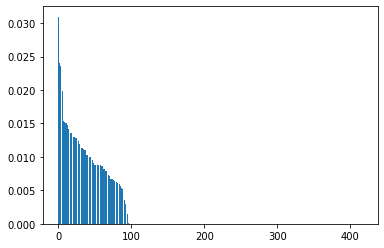

In [81]:
from matplotlib import pyplot
pyplot.bar(range(len(xgbreg.feature_importances_)), np.sort(xgbreg.feature_importances_)[::-1])
pyplot.show()

In [82]:
imp_feat_xgb = np.argsort(xgbreg.feature_importances_)[::-1][:100]

In [83]:
len(xgbreg.feature_importances_)

417

In [84]:
xgbreg.feature_importances_[imp_feat_xgb]

array([0.03095394, 0.02593251, 0.02406216, 0.02362242, 0.02205134,
       0.02084644, 0.01981697, 0.01533636, 0.01531824, 0.01527748,
       0.01512716, 0.01511262, 0.01495562, 0.01480098, 0.01418547,
       0.01391896, 0.0135331 , 0.0135229 , 0.0135178 , 0.01320385,
       0.01316646, 0.01294921, 0.01291357, 0.01287144, 0.01278652,
       0.01276644, 0.01263954, 0.01249584, 0.01235521, 0.0119755 ,
       0.01191155, 0.01190684, 0.01131679, 0.01130658, 0.01127791,
       0.01111443, 0.01109079, 0.01105483, 0.01081696, 0.01029464,
       0.01029244, 0.01023408, 0.0100748 , 0.00993729, 0.00992267,
       0.00978483, 0.00977708, 0.00946694, 0.00912045, 0.00910433,
       0.00885086, 0.00884256, 0.0088106 , 0.0087939 , 0.00878715,
       0.00878034, 0.00878024, 0.00875078, 0.00875061, 0.00867796,
       0.00865631, 0.00856983, 0.00823241, 0.00820441, 0.00798722,
       0.00793254, 0.00792149, 0.00781489, 0.00769848, 0.00730429,
       0.00710613, 0.00674608, 0.00673873, 0.00672717, 0.00672

In [85]:
x_train_imp = x_train_final.toarray()[:, imp_feat_xgb]
x_test_imp = x_test_final.toarray()[:, imp_feat_xgb]
# x_test_imp = x_test_final.toarray()[:, imp_feat_xgb]

# imp_feat_xgb

In [86]:
from sklearn.metrics import f1_score
colsample_bytree = [0.8, 0.9, 1]
subsamples = [0.8, 0.9, 1]
n_estimators= [500, 1000, 3000]
learning_rates = [0.1, 0.05, 0.03, 0.01]
gammas = [0,1,5]
cl = ['colsample_bytree', 'subsamples', 'n_estimators','learning_rates','gamma', 'train_f1_score', 'cv_f1_score']
xgboostparam = pd.DataFrame(columns=cl)
for col in colsample_bytree:
    for ss in subsamples:
        for ne in n_estimators:
            for lr in learning_rates:
                for gm in gammas:

                    xgbreg = XGBClassifier(missing=None,seed=8,
                                           colsample_bytree=col,
                                       subsample=ss,
                                       n_estimators=ne,
                                       learning_rate = lr,
                                        gamma = gm
                                       )
                    xgbreg.fit(x_train_imp, y_train)
                    predict_y_train = xgbreg.predict(x_train_imp)
                    predict_y_test = xgbreg.predict(x_test_imp)

                    train_f1 = f1_score(y_train, predict_y_train, labels=xgbreg.classes_, average="micro")
                    test_f1 = f1_score(y_test, predict_y_test, labels=xgbreg.classes_,average="micro")
                    ok = pd.DataFrame([(col, ss, ne, lr, gm, train_f1, test_f1),], columns=cl)
                    print(ok)
                    xgboostparam = xgboostparam.append(ok, ignore_index=True)

   colsample_bytree  subsamples  n_estimators  learning_rates  gamma  \
0               0.8         0.8           500             0.1      0   

   train_f1_score  cv_f1_score  
0        0.882136     0.496104  
   colsample_bytree  subsamples  n_estimators  learning_rates  gamma  \
0               0.8         0.8           500             0.1      1   

   train_f1_score  cv_f1_score  
0        0.822284     0.524675  
   colsample_bytree  subsamples  n_estimators  learning_rates  gamma  \
0               0.8         0.8           500             0.1      5   

   train_f1_score  cv_f1_score  
0        0.616022     0.501299  
   colsample_bytree  subsamples  n_estimators  learning_rates  gamma  \
0               0.8         0.8           500            0.05      0   

   train_f1_score  cv_f1_score  
0         0.80663     0.511688  
   colsample_bytree  subsamples  n_estimators  learning_rates  gamma  \
0               0.8         0.8           500            0.05      1   

   train_f1

   colsample_bytree  subsamples  n_estimators  learning_rates  gamma  \
0               0.8         0.9           500            0.05      0   

   train_f1_score  cv_f1_score  
0        0.790055     0.501299  


KeyboardInterrupt: 

In [ ]:
#   colsample_bytree  subsamples  n_estimators  learning_rates  gamma    train_f1_score  cv_f1_score 
# 0               0.8         0.8          1000            0.01      0       0.728361     0.527273      


In [105]:
xgbreg = XGBClassifier(missing=None,seed=8,
                                           colsample_bytree=0.8,
                                       subsample=0.8,
                                       n_estimators=1000,
                                       learning_rate = 0.01,
                                        gamma = 0
                                       )
xgbreg.fit(x_train_imp, y_train)
predict_y_train = xgbreg.predict(x_train_imp)
predict_y_test = xgbreg.predict(x_test_imp)

train_f1 = f1_score(y_train, predict_y_train, labels=xgbreg.classes_, average="micro")
test_f1 = f1_score(y_test, predict_y_test, labels=xgbreg.classes_,average="micro")

print("Train f1 score: ", train_f1, "|| Test f1 score: ", test_f1)


Train f1 score:  0.7283609576427255 || Test f1 score:  0.5272727272727272


In [131]:
# def best_hyper_param(depth_arr_param, estimator_arr_param, x_train_data, y_train_data, x_test_data, y_test_data):
#     max_auc = 0
#     train_auc = []
#     cv_auc = []
    
#     temp_max_auc = -100
#     my_max_depth =-100
#     my_min_estimators = -100
#     depth_arr = []
#     estimator_arr = []
#     auc_arr = []
#     auc_train_arr = []
    
#     cur=0
# #     total = len(max_depth)*len(min_samples_split)
#     for est in  estimator_arr_param:
#         for depth in depth_arr_param:
#             # CREATING A MODEL
#             clf = RandomForestClassifier(n_estimators=est, max_depth=depth, criterion='gini')
            
#             #FITTING THE VALUES IN THE MODLE on train data
#             clf.fit(x_train_data, y_train_data)
#             #getting prediction values
# #             help(clf.predict)
#             y_train_pred = clf.predict(x_train_data)
#             y_test_pred = clf.predict(x_test_data)
#             # getting auc score
#             cur_train_f1_score = f1_score(y_train, predict_y_train, average="micro")
#             cur_test_f1_score = f1_score(y_test, predict_y_test, average="micro")
#             print("Train f1  score of  ",cur_train_f1_score," CV f1 Score: ",cur_test_f1_score,"on depth: ", depth, " and estimator: ", est)
#             depth_arr.append(depth)
#             estimator_arr.append(est)
            
                
#     print("Returning max_depth: ", my_max_depth, " and estimator: ", my_min_estimators, " with auc value: ", temp_max_auc )
    

In [133]:
# from sklearn.ensemble import RandomForestClassifier
# depth_arr_param = [2, 5, 10]
# estimator_arr_param = [100, 200, 250, 300]
# print(best_hyper_param(depth_arr_param, estimator_arr_param, x_train_imp, y_train, x_test_imp, y_test))

# Test Data

In [135]:
data = pd.read_csv("DataSet/Test.csv")

In [136]:
trip_dist = []
for ind, row in data.iterrows():
    trip_dist.append(distance( (row["latitude_source"],row["longitude_source"]), (row["latitude_destination"],row["longitude_destination"])))
len(trip_dist)

964

In [137]:
data["trip_distance"] = trip_dist
data.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,trip_distance
0,mckbezdplrukagl,2016-10-06,01:05:38 AM,station$143,station$142,SZAYASZ,whber,4.243393,50.866728,39.121387,whber,4.273543,50.868337,39.121387,2016,40,Thursday,False,2.123383
1,agxwrnbmzbyxsjg,2016-10-06,01:05:56 AM,station$133,station$147,ICXYXY,whber,4.326220,50.880833,95.676301,whber,4.356801,50.845658,634.164740,2016,40,Thursday,False,4.461459
2,iqjojyewdyfshtj,2016-10-06,06:11:54 AM,station$632,station$544,ICWAT,whber,3.264549,50.824506,153.115607,whber,3.710675,51.035896,309.014451,2016,40,Thursday,False,39.115691
3,hssqexnzirioaag,2016-10-06,07:00:00 AM,station$296,station$281,ICWYR,whber,5.599695,50.613152,87.130058,whber,5.566695,50.624550,269.124277,2016,40,Thursday,False,2.650786
4,lublknpfraiznhr,2016-10-06,07:00:09 AM,station$281,station$266,ICWYR,whber,5.566695,50.624550,269.124277,whber,4.715866,50.882280,351.916185,2016,40,Thursday,False,66.361051


## Finding clusters

In [139]:
#Removing nan values from latitude and longitude columns:
print("Before: ",data.shape)
data = data[np.isfinite(data["latitude_source"])] # taking finite values from data where latitude values are finite
data = data[np.isfinite(data["longitude_source"])] # taking finite values from data where longitude values are finite
print("After: ",data.shape)

Before:  (964, 19)
After:  (964, 19)


In [140]:
data["pickup_cluster_number"] = kmeans.predict(data[["latitude_source", "longitude_source"]])

In [141]:
data['is_weekend'] = data['is_weekend'].apply(lambda x: 1 if x ==1 else 0)

In [142]:
if "current_data_time" in data.columns:
    data = data.drop("current_data_time", axis=1)

In [143]:
## filling the destination with no_dest because it may also contain some patterns in it
data["country_code_destination"] = data["country_code_destination"].fillna("No_dest")    

# data["country_code_destination"].isna()

In [144]:
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(x_train['source_name'].values)
# source_name_one_hot_cv = vectorizer.transform(x_cv['source_name'].values)
source_name_one_hot_test = vectorizer.transform(data['source_name'].values)

source_name_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",source_name_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",source_name_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",source_name_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 167)
Shape of Test matrix after one hot encodig  (964, 167)


In [145]:
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(x_train['destination_name'].values)
# destination_name_one_hot_cv = vectorizer.transform(x_cv['destination_name'].values)
destination_name_one_hot_test = vectorizer.transform(data['destination_name'].values)

destination_name_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",destination_name_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",destination_name_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",destination_name_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 183)
Shape of Test matrix after one hot encodig  (964, 183)


In [146]:
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(x_train['country_code_source'].values)
# country_code_source_one_hot_cv = vectorizer.transform(x_cv['country_code_source'].values)
country_code_source_one_hot_test = vectorizer.transform(data['country_code_source'].values)

country_code_source_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",country_code_source_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",country_code_source_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",country_code_source_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 3)
Shape of Test matrix after one hot encodig  (964, 3)


In [147]:
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(x_train['country_code_destination'].values)
# country_code_destination_one_hot_cv = vectorizer.transform(x_cv['country_code_destination'].values)
country_code_destination_one_hot_test = vectorizer.transform(data['country_code_destination'].values)

country_code_destination_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",country_code_destination_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",country_code_destination_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",country_code_destination_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 4)
Shape of Test matrix after one hot encodig  (964, 4)


In [148]:
if "longitude_source" in data.columns:
#     x_cv = x_cv.drop("longitude_source", axis=1)
    data = data.drop("longitude_source", axis=1)

if "latitude_source" in data.columns:
#     x_cv = x_cv.drop("latitude_source", axis=1)
    data = data.drop("latitude_source", axis=1)

if "longitude_destination" in data.columns:
#     x_cv = x_cv.drop("longitude_destination", axis=1)
    data = data.drop("longitude_destination", axis=1)

if "latitude_destination" in data.columns:
#     x_cv = x_cv.drop("latitude_destination", axis=1)
    data = data.drop("latitude_destination", axis=1)

In [149]:
# converting values to string values which are understandable
# current_year_train = x_train['current_year'].apply(lambda x: "current_year_"+str(x))
# current_year_cv = x_cv['current_year'].apply(lambda x: "current_year_"+str(x))
current_year_test = data['current_year'].apply(lambda x: "current_year_"+str(x))


In [150]:
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(current_year_train)
# current_year_one_hot_cv = vectorizer.transform(current_year_cv)
current_year_one_hot_test = vectorizer.transform(current_year_test)

current_year_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",current_year_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",current_year_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",current_year_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 1)
Shape of Test matrix after one hot encodig  (964, 1)


In [151]:
# converting values to string values which are understandable
# current_week_cv = x_cv['current_week'].apply(lambda x: "current_week_"+str(x))
current_week_test = data['current_week'].apply(lambda x: "current_week_"+str(x))

vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(current_week_train)
# current_week_one_hot_cv = vectorizer.transform(current_week_cv)
current_week_one_hot_test = vectorizer.transform(current_week_test)

current_week_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",current_week_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",current_week_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",current_week_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 11)
Shape of Test matrix after one hot encodig  (964, 11)


In [152]:

current_day_test = data['current_day'].apply(lambda x: "current_day_"+str(x))

vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(current_day_train)
# current_day_one_hot_cv = vectorizer.transform(current_day_cv)
current_day_one_hot_test = vectorizer.transform(current_day_test)

current_day_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",current_day_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",current_day_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",current_day_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 7)
Shape of Test matrix after one hot encodig  (964, 7)


In [153]:
pickup_cluster_number_test = data['pickup_cluster_number'].apply(lambda x: "pickup_cluster_number_"+str(x))

In [154]:
vectorizer = CountVectorizer(lowercase=False)
vectorizer.fit(pickup_cluster_number_train)
# pickup_cluster_number_one_hot_cv = vectorizer.transform(pickup_cluster_number_cv)
pickup_cluster_number_one_hot_test = vectorizer.transform(pickup_cluster_number_test)

country_code_source_one_hot_names = vectorizer.get_feature_names()
print("Shape of Train matrix after one hot encodig ",pickup_cluster_number_one_hot_train.shape)
# print("Shape of CV matrix after one hot encodig ",pickup_cluster_number_one_hot_cv.shape)
print("Shape of Test matrix after one hot encodig ",pickup_cluster_number_one_hot_test.shape)

Shape of Train matrix after one hot encodig  (875, 38)
Shape of Test matrix after one hot encodig  (964, 38)


In [155]:
from sklearn.preprocessing import StandardScaler

_scaler = StandardScaler()
mhtd_train = _scaler.fit_transform(x_train['mean_halt_times_destination'].values.reshape(-1,1)) 
# mhtd_cv = _scaler.transform(x_cv['mean_halt_times_destination'].values.reshape(-1,1)) 
mhtd_test = _scaler.transform(data['mean_halt_times_destination'].values.reshape(-1,1)) 



In [156]:
_scaler = StandardScaler()
mhts_train = _scaler.fit_transform(x_train['mean_halt_times_source'].values.reshape(-1,1)) 
# mhts_cv = _scaler.transform(x_cv['mean_halt_times_source'].values.reshape(-1,1)) 
mhts_test = _scaler.transform(data['mean_halt_times_source'].values.reshape(-1,1))

In [157]:
_scaler = StandardScaler()
trip_dist_train = _scaler.fit_transform(x_train['trip_distance'].values.reshape(-1,1)) 
# mhts_cv = _scaler.transform(x_cv['mean_halt_times_source'].values.reshape(-1,1)) 
trip_dist_test = _scaler.transform(data['trip_distance'].values.reshape(-1,1))

In [158]:
data_final = hstack([source_name_one_hot_test,
                        destination_name_one_hot_test,
                        country_code_source_one_hot_test,
                        country_code_destination_one_hot_test,
                        current_year_one_hot_test,
                        current_week_one_hot_test,
                        current_day_one_hot_test,
                        pickup_cluster_number_one_hot_test,
                        mhtd_test,
                        trip_dist_test,
                        mhts_test])

In [160]:
data_imp = data_final.toarray()[:, imp_feat_xgb]
predict_y_test = xgbreg.predict(data_imp)

In [161]:
data["target"] = predict_y_test

In [162]:
data["target"] = data["target"].replace(to_replace="0", value="low")
data["target"] = data["target"].replace(to_replace="1", value="medium")
data["target"] = data["target"].replace(to_replace="2", value="high")

In [163]:
data.to_csv("Results.csv")

In [164]:
data.head()

,id_code,current_date,current_time,source_name,destination_name,train_name,country_code_source,mean_halt_times_source,country_code_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,trip_distance,pickup_cluster_number,target
0,mckbezdplrukagl,2016-10-06,01:05:38 AM,station$143,station$142,SZAYASZ,whber,39.121387,whber,39.121387,2016,40,Thursday,0,2.123383,1,low
1,agxwrnbmzbyxsjg,2016-10-06,01:05:56 AM,station$133,station$147,ICXYXY,whber,95.676301,whber,634.164740,2016,40,Thursday,0,4.461459,1,medium
2,iqjojyewdyfshtj,2016-10-06,06:11:54 AM,station$632,station$544,ICWAT,whber,153.115607,whber,309.014451,2016,40,Thursday,0,39.115691,24,medium
3,hssqexnzirioaag,2016-10-06,07:00:00 AM,station$296,station$281,ICWYR,whber,87.130058,whber,269.124277,2016,40,Thursday,0,2.650786,2,low
4,lublknpfraiznhr,2016-10-06,07:00:09 AM,station$281,station$266,ICWYR,whber,269.124277,whber,351.916185,2016,40,Thursday,0,66.361051,2,medium


In [166]:
ans = pd.DataFrame()
ans["id_code"] = data["id_code"]
ans["target"] = data["target"]

In [170]:
ans.to_csv("Results.csv", index=False)

In [406]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=2, criterion='gini')
            
#FITTING THE VALUES IN THE MODLE on train data
clf.fit(x_train_final, y_train)
#getting prediction values
y_train_pred = clf.predict(x_train_final.toarray())
# y_train_pred = clf.predict(clf, x_train_final.toarray())

In [409]:

depth_arr_param = [2, 5, 10]
estimator_arr_param = [100, 200, 250, 300]
for dpth in depth_arr_param:
    for estm in estimator_arr_param:
        clf = RandomForestClassifier(n_estimators=estm, max_depth=dpth, criterion='gini')
        clf.fit(x_train_final, y_train) 
        y_train_pred = clf.predict(x_train_final.toarray())
        y_test_pred = clf.predict(x_test_final.toarray())
        train_f1 = f1_score(y_train, y_train_pred, average="micro")
        test_f1 = f1_score(y_test, y_test_pred, average="micro")
        print("Trainf1: ", train_f1, "Testf1: ", test_f1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [413]:
for val in pd.DataFrame(x_train_final.toarray()).isna().sum():
    print(val)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
